In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import pearsonr as pr

In [2]:
#Load temperature data and convert dates to date object
meteo = pd.read_csv("./meteo_Guyane.csv")
indice = pd.read_csv("./indices_Guyane.csv")
#meteo.columns = ['Date','temp']

In [3]:
indice.head()

,system:time_start,ARVI,EVI,NDVI,NDWI
0,"January 1, 2018",0.578,0.396,0.371,0.309
1,"February 1, 2018",0.721,0.446,0.483,0.371
2,"March 1, 2018",0.687,0.475,0.479,0.341
3,"April 1, 2018",0.607,0.450,0.415,0.318
4,"May 1, 2018",0.588,0.436,0.403,0.289


In [4]:
indice.tail()

,system:time_start,ARVI,EVI,NDVI,NDWI
25,"February 1, 2020",0.721,0.465,0.491,0.376
26,"March 1, 2020",0.638,0.447,0.430,0.318
27,"April 1, 2020",0.527,0.407,0.348,0.273
28,"May 1, 2020",0.642,0.435,0.406,0.335
29,"June 1, 2020",0.771,0.478,0.494,0.369


In [5]:
meteo.head()

,system:time_start,mean_2m_air_temperature,total_precipitation
0,"Jan 1, 2018",25.713,NaN
1,"Jan 1, 2018",NaN,276.914
2,"Feb 1, 2018",25.415,NaN
3,"Feb 1, 2018",NaN,313.633
4,"Mar 1, 2018",26.098,NaN


In [6]:
meteo.columns = ['date','temperature', 'precipitation']
#meteo['Date'] = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in temp['Date']]

In [7]:
indice.columns = ['date','ARVI', 'EVI', 'NDVI', 'NDWI']
indice['date'] = [dt.datetime.strptime(d,'%B %d, %Y').date() for d in indice['date']]

In [8]:
indice_df= indice.copy()

In [9]:
indice_df=indice_df.set_index('date')

In [10]:
indice.head()

,date,ARVI,EVI,NDVI,NDWI
0,2018-01-01,0.578,0.396,0.371,0.309
1,2018-02-01,0.721,0.446,0.483,0.371
2,2018-03-01,0.687,0.475,0.479,0.341
3,2018-04-01,0.607,0.450,0.415,0.318
4,2018-05-01,0.588,0.436,0.403,0.289


In [11]:
meteo.head(2)

,date,temperature,precipitation
0,"Jan 1, 2018",25.713,NaN
1,"Jan 1, 2018",NaN,276.914


In [12]:
meteo.shape

(60, 3)

In [13]:
meteo_temp= meteo[["date", "temperature"]]

In [14]:
meteo_temp.shape

(60, 2)

In [15]:
meteo_temp=meteo_temp.dropna()

In [16]:
meteo_temp.shape

(30, 2)

In [17]:
meteo_precip=meteo[["date", "precipitation"]]

In [18]:
meteo_precip.shape

(60, 2)

In [19]:
meteo_precip = meteo_precip.dropna()

In [20]:
meteo_precip.shape

(30, 2)

In [21]:
date1= list(meteo_temp['date'])

In [22]:
date2= list(meteo_precip['date'])

In [23]:
for i in range(len(date1)):
    assert date1[i]==date2[i]

In [24]:
df=meteo_temp.merge(meteo_precip)


In [25]:
df['date'] = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in df['date']]
meteo_temp['date'] = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in meteo_temp['date']]
meteo_precip['date'] = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in meteo_precip['date']]

In [26]:
df=df.set_index('date')

In [27]:
#define_dates=[True for i in range(indice.shape[0]) if i<30  or False]


In [28]:
#len(define_dates)

In [29]:
#indice_sub_df=indice_df.iloc[define_dates,:]

In [30]:
df.shape

(30, 2)

In [31]:
df.head(2)

,temperature,precipitation
date,,
2018-01-01,25.713,276.914
2018-02-01,25.415,313.633


In [32]:
plt.style.use("tableau-colorblind10")
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


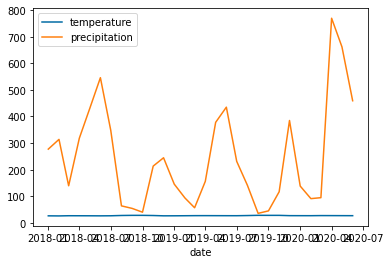

In [33]:
axe=df.plot()

In [34]:
meteo.describe()

,temperature,precipitation
count,30.000000,30.000000
mean,26.454400,247.071800
std,0.614265,193.447443
min,25.415000,35.058000
25%,26.035750,93.229750
50%,26.345000,184.333500
75%,26.767250,370.246500
max,27.630000,769.715000


In [35]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           60 non-null     object 
 1   temperature    30 non-null     float64
 2   precipitation  30 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [52]:
# ------------- Plot the indexes ----------
#Initialize plot and parameters
sns.set(rc={'figure.figsize':(16,6)})
#sns.set_context('paper')

#Plot colors
prec_color = 'cornflowerblue'
temp_color = 'fuchsia'


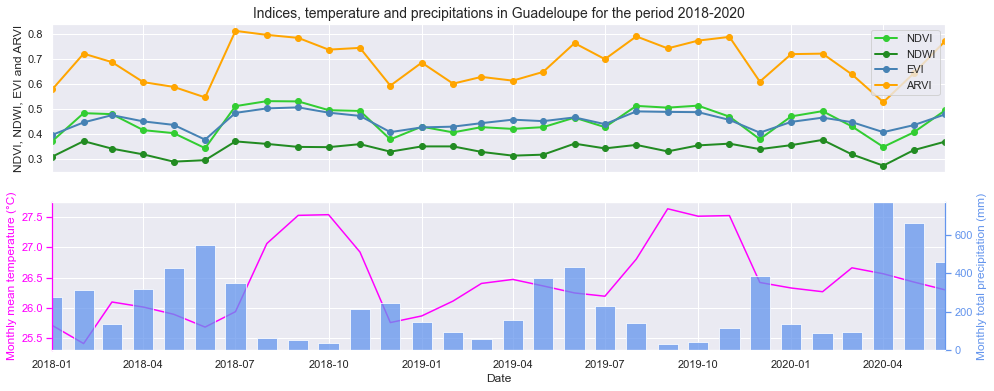

In [54]:
#Create the figure with a date x-axis
plt.style.use("tableau-colorblind10")
fig,ax = plt.subplots(2,1, sharex=True)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y_%b'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 60))
#ax.set_xlim(dt.date(2017,12,1),dt.date(2020,2,1))
ax[1].set_xlim(df.index.min(),df.index.max())



#Plot precipitation
ax2 = ax[1].twinx()


p_prec = ax2.bar(meteo_precip['date'],meteo_precip['precipitation'], width = 20, alpha = .75, color = prec_color,label = 'precipation(mm)')
ax2.set_ylim(0,770)
ax2.grid(False)
ax2.set_ylabel('Monthly total precipitation (mm)',fontsize = 12)
ax2.spines['right'].set_color(prec_color)
ax2.tick_params(axis='y', colors = prec_color)
ax2.yaxis.label.set_color(prec_color)

#Plot temperature
p_temp = ax[1].plot(meteo_temp['date'],meteo_temp['temperature'],'-',color =temp_color,label = 'T (°C)')
ax2.spines['left'].set_color(temp_color)
ax[1].tick_params(axis='y',colors = temp_color)
ax[1].yaxis.label.set_color(temp_color)
ax[1].set_ylabel('Monthly mean temperature (°C)', fontsize = 12)
#ax[1].yaxis.tick_right()


ax[0].plot(indice['date'],indice['NDVI'],'o-',linewidth = 2, color='limegreen',label='NDVI')
ax[0].plot(indice['date'],indice['NDWI'],'o-',linewidth = 2, color='forestgreen',label='NDWI')
#ax[0].set_xlabel('Date',fontsize=12)
ax[0].set_ylabel('NDVI, NDWI, EVI and ARVI',fontsize=12)
ax[0].set_title('Indices, temperature and precipitations in Guadeloupe for the period 2018-2020',fontsize = 14)

ax[0].plot(indice['date'],indice['EVI'],'o-',linewidth = 2, color = 'steelblue', label ='EVI')
#ax.set_ylabel('EVI')

ax[0].plot(indice['date'],indice['ARVI'],'o-',linewidth = 2, color = 'orange', label ='ARVI')
#ax.set_ylabel('ARVI')
ax[0].legend(loc = 'upper right')


ax[1].set_xlabel('Date',fontsize = 12)
plt.savefig('temp_prec.png',dpi=250,bbox_inches = 'tight')


In [38]:
#meteo_temp = meteo_temp.set_index('date')
#meteo_precip = meteo_precip.set_index('date')

In [39]:
#meteo_temp.index.min()

In [40]:
#meteo_precip.head()

In [41]:
meteo_temp.index.max()

58

In [42]:
meteo_temp.head()

,date,temperature
0,2018-01-01,25.713
2,2018-02-01,25.415
4,2018-03-01,26.098
6,2018-04-01,26.015
8,2018-05-01,25.896


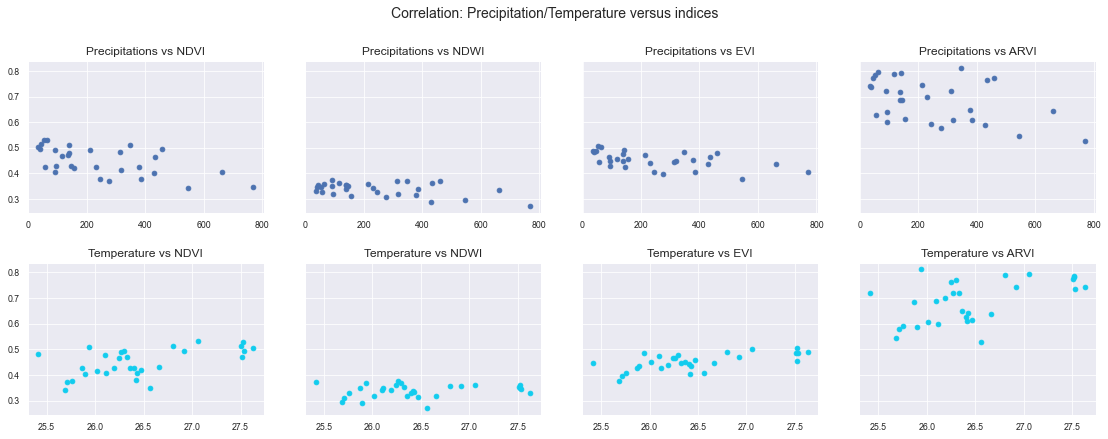

In [43]:
# correlation
fig1,ax1=plt.subplots(2, 4, figsize=(16,6), sharex= False, sharey= True )
fig1.tight_layout(pad=3.0)
fig1.suptitle("Correlation: Precipitation/Temperature versus indices", fontsize = 14, y=1.05)

precipitation_list = list(meteo_precip["precipitation"])
temperature_list = list(meteo_temp["temperature"])
ndvi_list = list(indice["NDVI"])
ndwi_list = list(indice["NDWI"])
evi_list = list(indice["EVI"])
arvi_list = list(indice["ARVI"])

#Precipitation
_= ax1[0,0].scatter(precipitation_list, ndvi_list)
ax1[0,0].set_title('Precipitations vs NDVI',fontsize = 12)

ax1[0,1].scatter(precipitation_list, ndwi_list)
ax1[0,1].set_title('Precipitations vs NDWI',fontsize = 12)

ax1[0,2].scatter(precipitation_list, evi_list)
ax1[0,2].set_title('Precipitations vs EVI',fontsize = 12)

ax1[0,3].scatter(precipitation_list, arvi_list)
ax1[0,3].set_title('Precipitations vs ARVI',fontsize = 12)

#Temperature
color="#11ccee"
_= ax1[1,0].scatter(temperature_list, ndvi_list, c=color)
ax1[1,0].set_title('Temperature vs NDVI',fontsize = 12)

ax1[1,1].scatter(temperature_list, ndwi_list, c=color)
ax1[1,1].set_title('Temperature vs NDWI',fontsize = 12)

ax1[1,2].scatter(temperature_list, evi_list, c=color)
ax1[1,2].set_title('Temperature vs EVI',fontsize = 12)

ax1[1,3].scatter(temperature_list, arvi_list, c=color)
ax1[1,3].set_title('Temperature vs ARVI',fontsize = 12)
plt.savefig('CorrelationGraph.png',dpi=250,bbox_inches = 'tight')

In [44]:
corr_precip_ndvi,_=pr(precipitation_list, ndvi_list)

In [45]:
corr_precip_ndvi
print("correlation between precipitation and ndvi: %.3f" % corr_precip_ndvi)

correlation between precipitation and ndvi: -0.574


In [46]:
corr_temp_ndvi,_=pr(temperature_list, ndvi_list)

In [47]:
corr_temp_ndvi

0.5504825659930372

In [48]:
corr_temp_evi,_=pr(temperature_list, evi_list)
corr_temp_evi

0.6318570340830695

In [49]:
#ndvi_list

In [50]:
#precipitation_list